In [30]:
# imports
import sys
sys.path.append('../')

from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [31]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 32
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 32
plt.rcParams['figure.titlesize'] = 48

In [32]:
train_path = '../img/data/train'
test_path = '../img/data/test'

In [33]:
paths = sorted(glob('../models/numpy/*.model'))

In [34]:
acc = []
for path in paths:
    acc.append(float(path.split('/')[-1].split('-')[0].split('_')[1]))

Text(0, 0.5, 'accuracy')

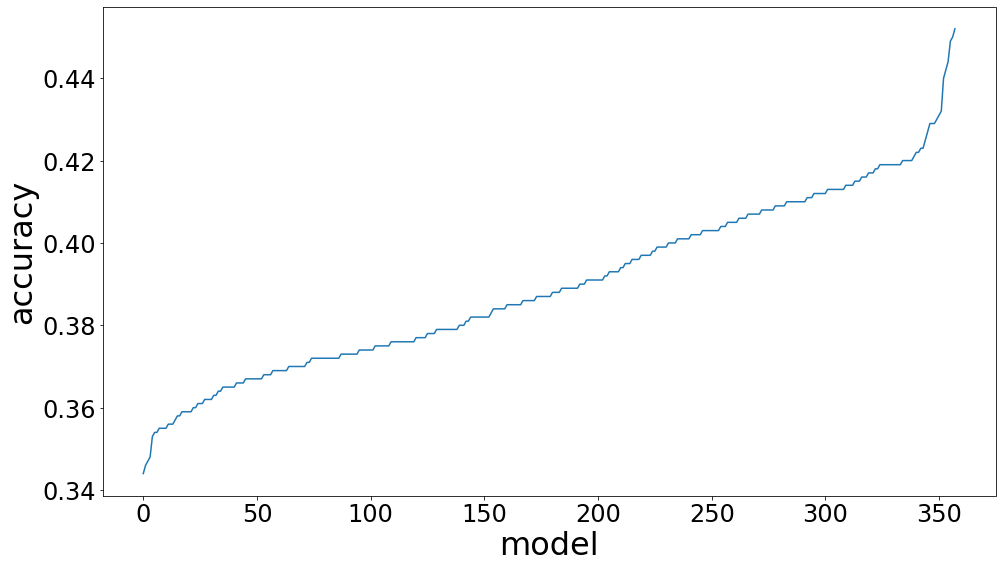

In [35]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(acc)
ax.set_xlabel('model')
ax.set_ylabel('accuracy')